In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
dataframe = pd.read_excel('default_of_credit_card_clients.xls', header = 0)
dataframe.drop('Unnamed: 0',axis=1, inplace = True)
dataframe.drop([0],axis=0, inplace = True)

credit_cards = dataframe.copy()
credit_cards

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Opis zmiennych:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary = credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

### Additional Information:

Education (0, 4, 5, 6 = others. I'll be opting to group '0','5' and '6' together)

Marital status (3 = divorce; 0=others)

PAY_AMTX: (-2 = No consumption; -1 = Paid in full; 0 = The use of revolving credit)

Źródło: szperanie po Kaggle. Czy wiarygodne? Trudno powiedzieć. Ale przy tym pozostanę.

In [3]:
credit_cards.dtypes

X1     object
X2     object
X3     object
X4     object
X5     object
X6     object
X7     object
X8     object
X9     object
X10    object
X11    object
X12    object
X13    object
X14    object
X15    object
X16    object
X17    object
X18    object
X19    object
X20    object
X21    object
X22    object
X23    object
Y      object
dtype: object

In [4]:
credit_cards = credit_cards.astype(float)

In [5]:
credit_cards.isnull().mean()*100

X1     0.0
X2     0.0
X3     0.0
X4     0.0
X5     0.0
X6     0.0
X7     0.0
X8     0.0
X9     0.0
X10    0.0
X11    0.0
X12    0.0
X13    0.0
X14    0.0
X15    0.0
X16    0.0
X17    0.0
X18    0.0
X19    0.0
X20    0.0
X21    0.0
X22    0.0
X23    0.0
Y      0.0
dtype: float64

In [6]:
credit_cards.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Każdą zmienną przeanalizuję pod względem zgodności z legendą. Czy jej wartości mieszczą się w zadanych w legendzie przedziałach.

In [7]:
np.sort(credit_cards['X1'].unique())

array([  10000.,   16000.,   20000.,   30000.,   40000.,   50000.,
         60000.,   70000.,   80000.,   90000.,  100000.,  110000.,
        120000.,  130000.,  140000.,  150000.,  160000.,  170000.,
        180000.,  190000.,  200000.,  210000.,  220000.,  230000.,
        240000.,  250000.,  260000.,  270000.,  280000.,  290000.,
        300000.,  310000.,  320000.,  327680.,  330000.,  340000.,
        350000.,  360000.,  370000.,  380000.,  390000.,  400000.,
        410000.,  420000.,  430000.,  440000.,  450000.,  460000.,
        470000.,  480000.,  490000.,  500000.,  510000.,  520000.,
        530000.,  540000.,  550000.,  560000.,  570000.,  580000.,
        590000.,  600000.,  610000.,  620000.,  630000.,  640000.,
        650000.,  660000.,  670000.,  680000.,  690000.,  700000.,
        710000.,  720000.,  730000.,  740000.,  750000.,  760000.,
        780000.,  800000., 1000000.])

In [8]:
np.sort(credit_cards['X2'].unique())

array([1., 2.])

In [9]:
np.sort(credit_cards['X3'].unique())

array([0., 1., 2., 3., 4., 5., 6.])

Wartości 0, 5 i 6 dodaję do zbioru "others", czyli nr 4.

In [10]:
credit_cards['X3'].replace([0,5,6], 4, inplace = True)
np.sort(credit_cards['X3'].unique())

array([1., 2., 3., 4.])

In [11]:
np.sort(credit_cards['X4'].unique())

array([0., 1., 2., 3.])

In [12]:
np.sort(credit_cards['X5'].unique())

array([21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.,
       60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72.,
       73., 74., 75., 79.])

In [13]:
np.sort(credit_cards['X6'].unique())

array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [14]:
np.sort(credit_cards['X7'].unique())

array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [15]:
np.sort(credit_cards['X8'].unique())

array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [16]:
np.sort(credit_cards['X9'].unique())

array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [17]:
np.sort(credit_cards['X10'].unique())

array([-2., -1.,  0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [18]:
np.sort(credit_cards['X11'].unique())

array([-2., -1.,  0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [19]:
np.sort(credit_cards['X12'].unique())

array([-165580., -154973.,  -15308., ...,  653062.,  746814.,  964511.])

In [20]:
np.sort(credit_cards['X13'].unique())

array([-69777., -67526., -33350., ..., 671563., 743970., 983931.])

In [21]:
np.sort(credit_cards['X14'].unique())

array([-157264.,  -61506.,  -46127., ...,  693131.,  855086., 1664089.])

In [22]:
np.sort(credit_cards['X15'].unique())

array([-170000.,  -81334.,  -65167., ...,  628699.,  706864.,  891586.])

In [23]:
np.sort(credit_cards['X16'].unique())

array([-81334., -61372., -53007., ..., 587067., 823540., 927171.])

In [24]:
np.sort(credit_cards['X17'].unique())

array([-339603., -209051., -150953., ...,  568638.,  699944.,  961664.])

In [25]:
print(np.sort(credit_cards['X18'].unique()))

[0.00000e+00 1.00000e+00 2.00000e+00 ... 4.93358e+05 5.05000e+05
 8.73552e+05]


In [26]:
print(np.sort(credit_cards['X19'].unique()))

[0.000000e+00 1.000000e+00 2.000000e+00 ... 1.215471e+06 1.227082e+06
 1.684259e+06]


In [27]:
print(np.sort(credit_cards['X20'].unique()))

[0.00000e+00 1.00000e+00 2.00000e+00 ... 5.08229e+05 8.89043e+05
 8.96040e+05]


In [28]:
print(np.sort(credit_cards['X21'].unique()))

[0.00000e+00 1.00000e+00 2.00000e+00 ... 4.97000e+05 5.28897e+05
 6.21000e+05]


In [29]:
print(np.sort(credit_cards['X22'].unique()))

[0.00000e+00 1.00000e+00 2.00000e+00 ... 3.88071e+05 4.17990e+05
 4.26529e+05]


In [30]:
print(np.sort(credit_cards['X23'].unique()))

[0.00000e+00 1.00000e+00 2.00000e+00 ... 4.43001e+05 5.27143e+05
 5.28666e+05]


In [31]:
np.sort(credit_cards['Y'].unique())

array([0., 1.])

In [32]:
features = credit_cards.drop(['Y'],axis=1)
target = credit_cards['Y']

X, y = features, target
print('X:')
display(X)
print('\ny:')
display(y)

X:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0



y:


1        1.0
2        1.0
3        0.0
4        0.0
5        0.0
        ... 
29996    0.0
29997    0.0
29998    1.0
29999    1.0
30000    1.0
Name: Y, Length: 30000, dtype: float64

In [33]:
y.value_counts(normalize=True)

0.0    0.7788
1.0    0.2212
Name: Y, dtype: float64

Teraz już wiemy, ze każdy model poniżej accuracy 0.78 jest gorszy od zwykłego przypisania wartości testowych y=0.

Unique values: 81


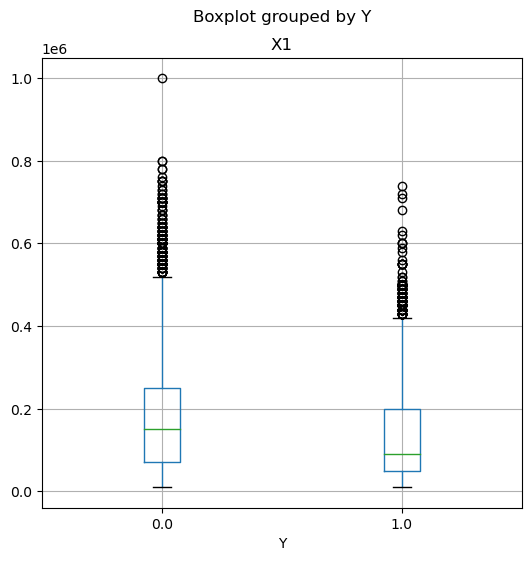

Unique values: 2


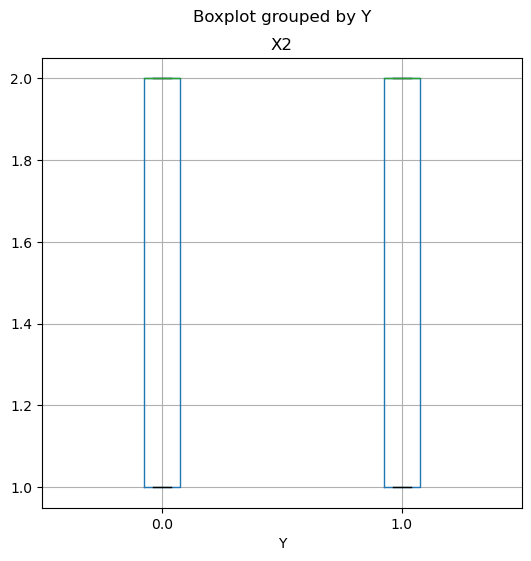

Unique values: 4


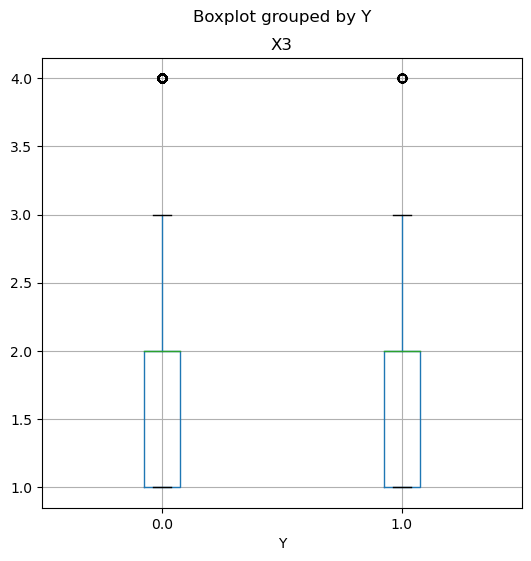

Unique values: 4


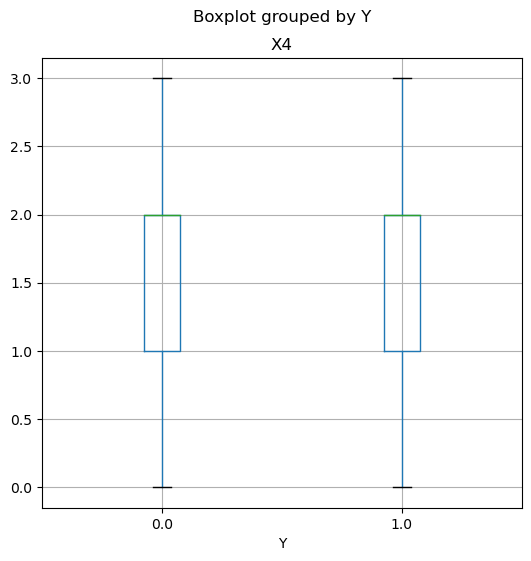

Unique values: 56


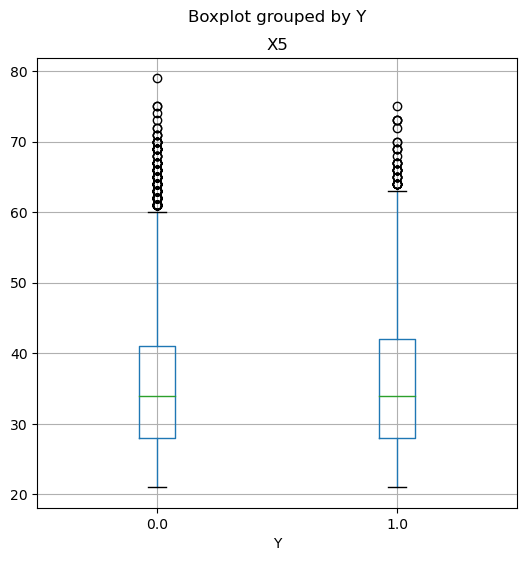

Unique values: 11


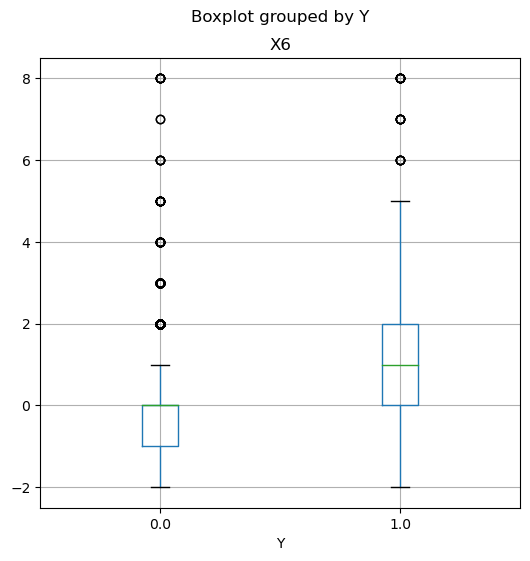

Unique values: 11


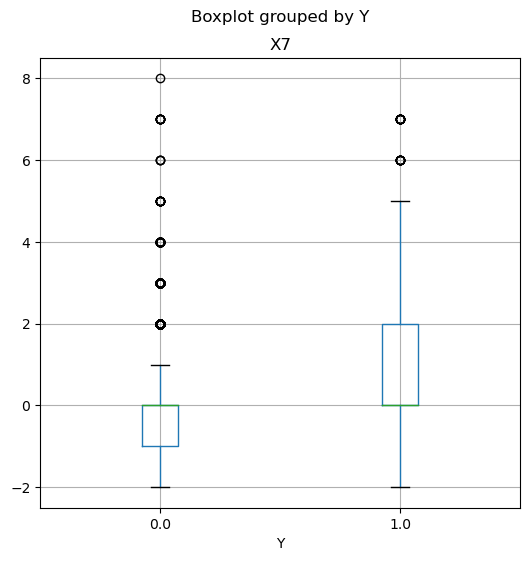

Unique values: 11


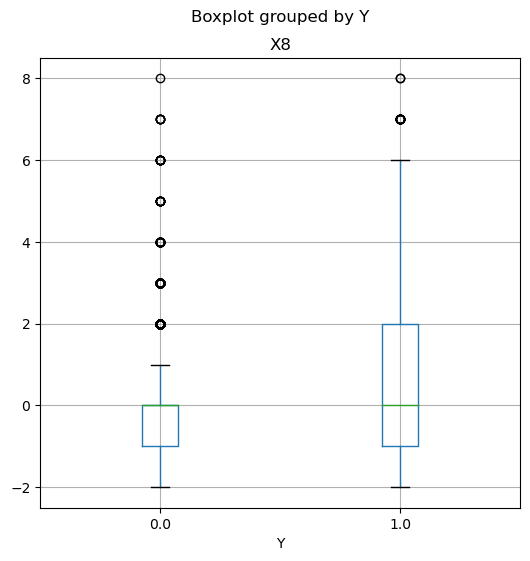

Unique values: 11


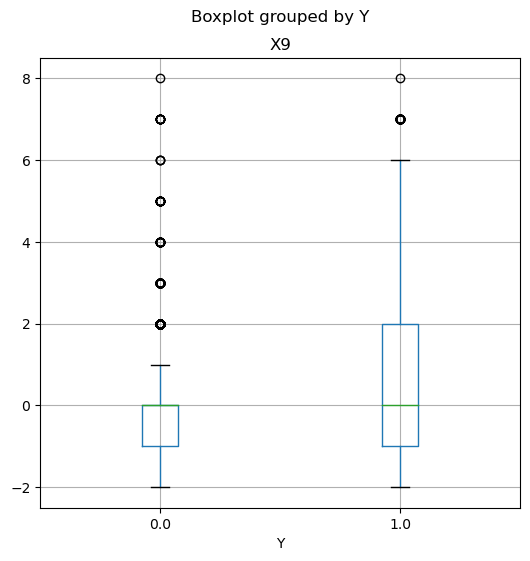

Unique values: 10


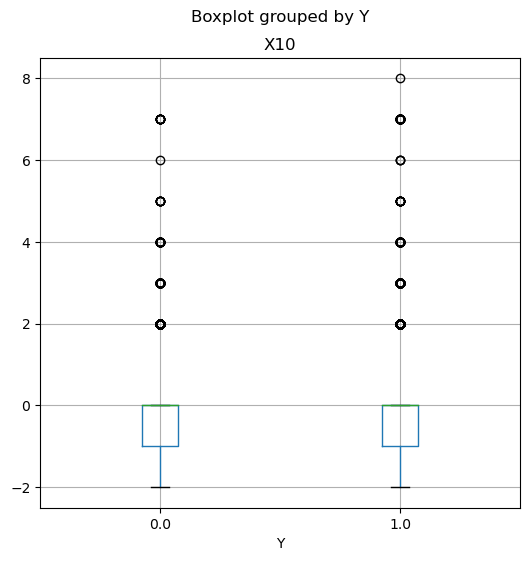

Unique values: 10


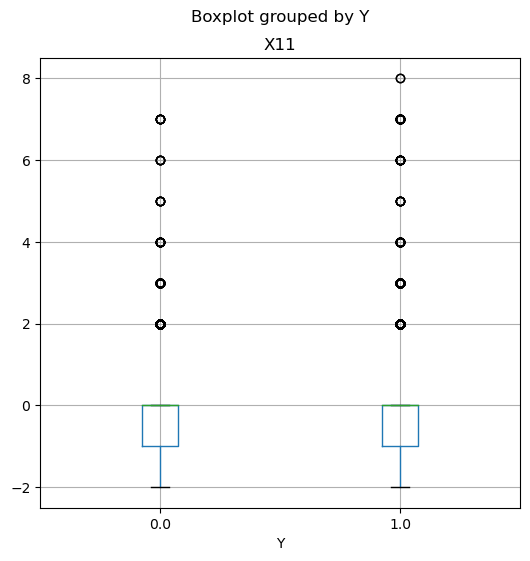

Unique values: 22723


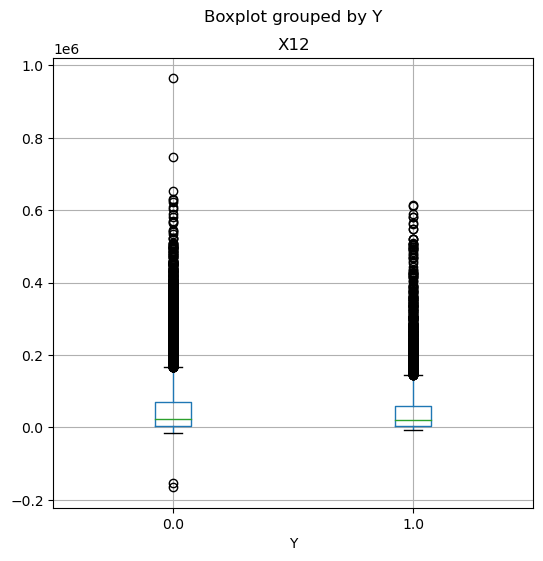

Unique values: 22346


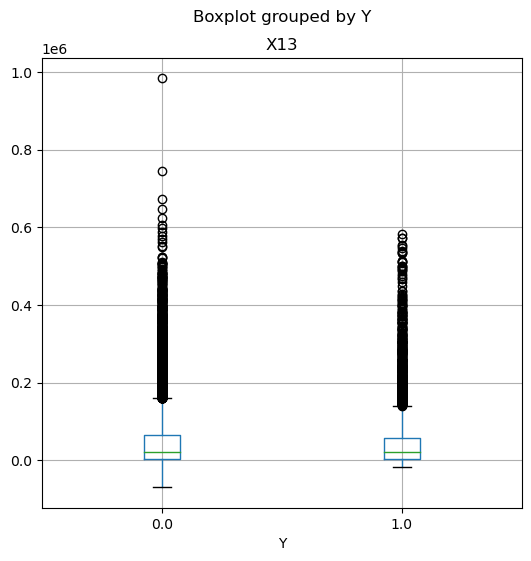

Unique values: 22026


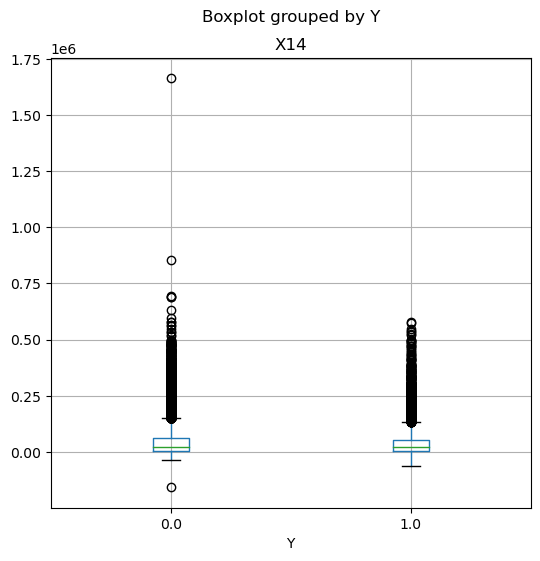

Unique values: 21548


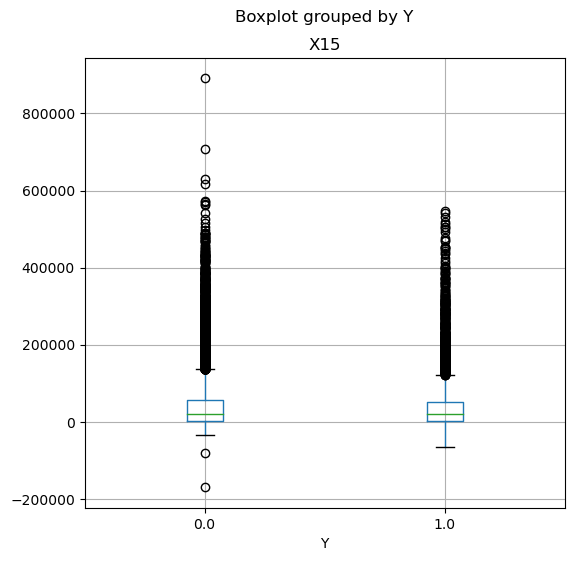

Unique values: 21010


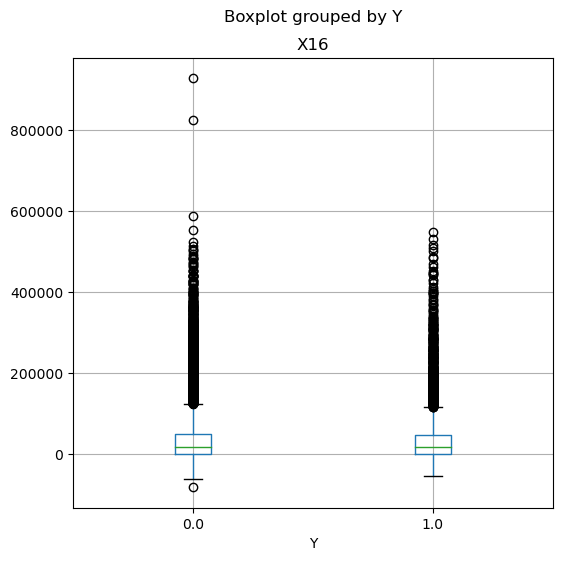

Unique values: 20604


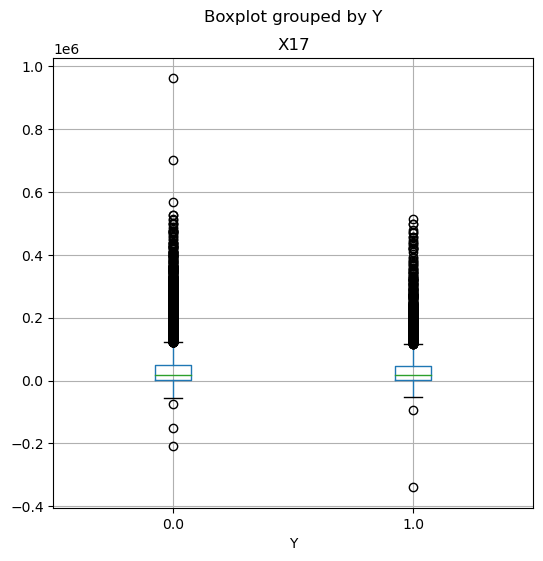

Unique values: 7943


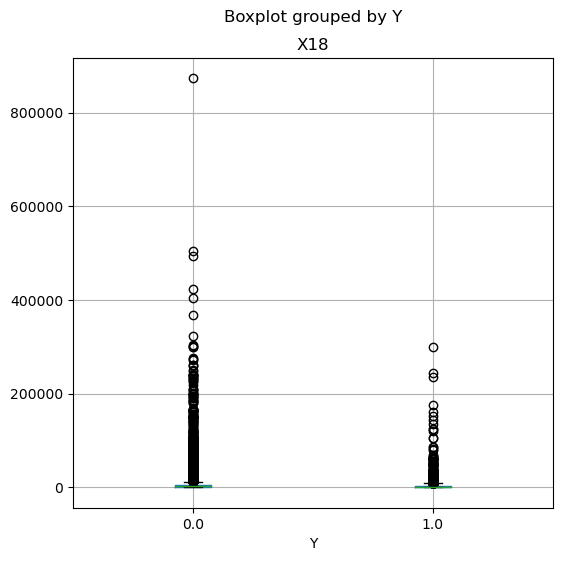

Unique values: 7899


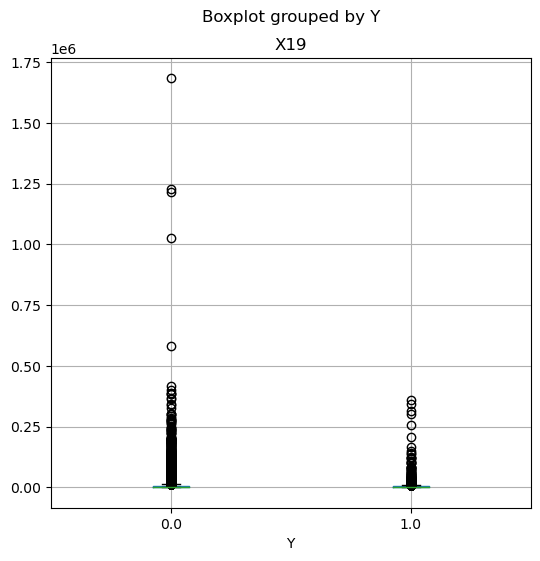

Unique values: 7518


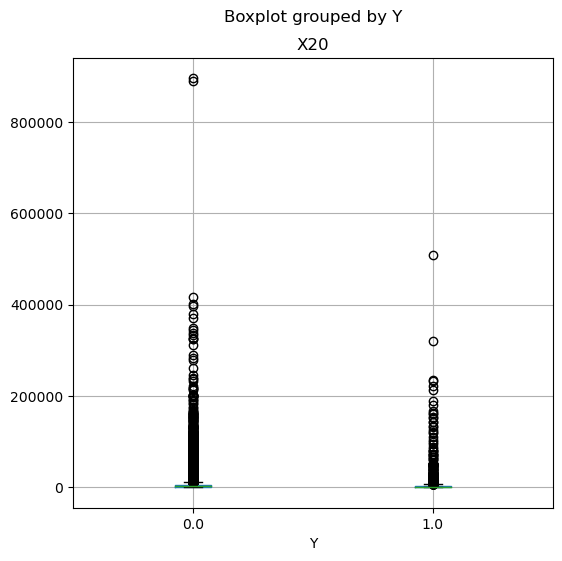

Unique values: 6937


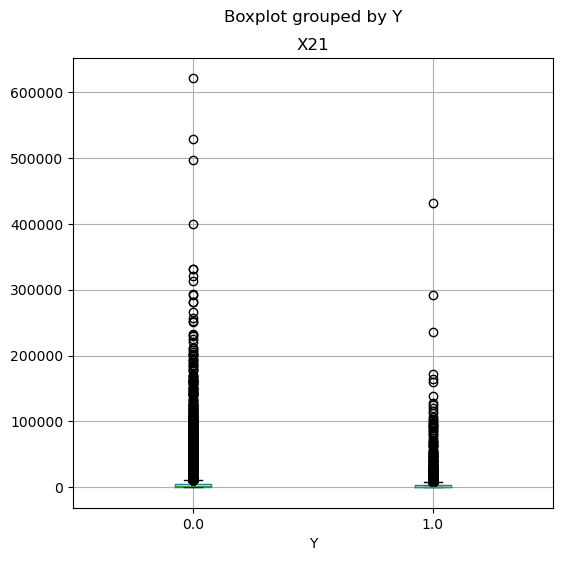

Unique values: 6897


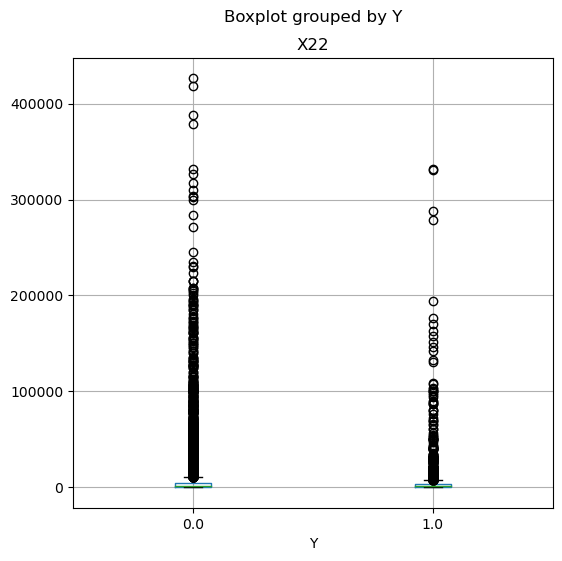

Unique values: 6939


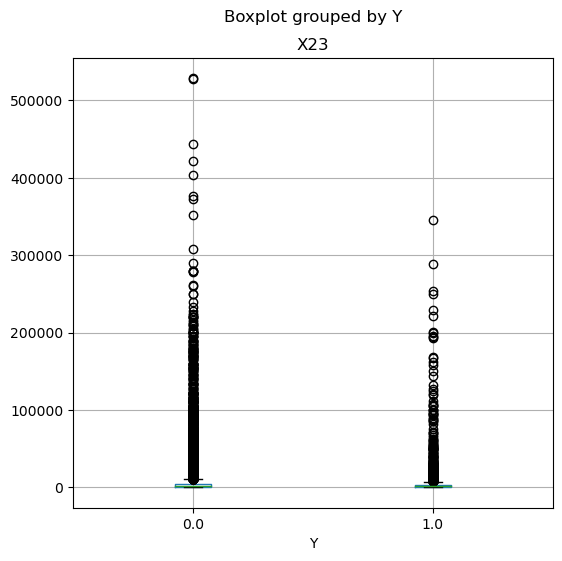

In [34]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(credit_cards[col].unique())}')
    credit_cards.boxplot(column=col, by='Y', figsize=(6,6))
    plt.title(col)
    plt.show()

Oprócz zmiennych X6 oraz X7 wykresy dla y = 0 oraz y = 1 wygladaja podobnie lub tak samo.

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

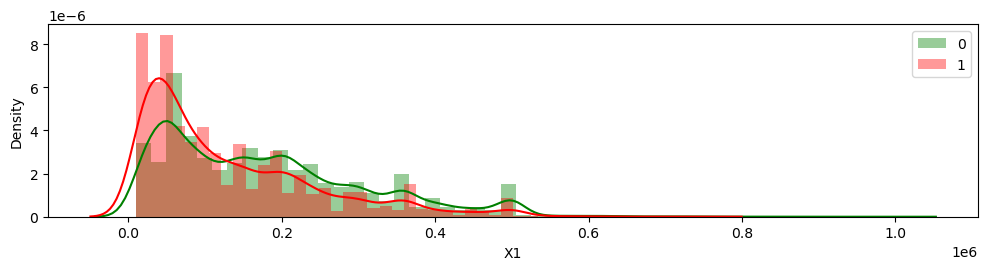

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

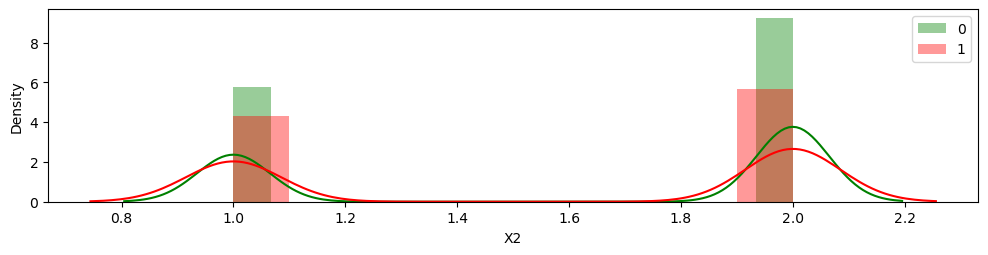

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

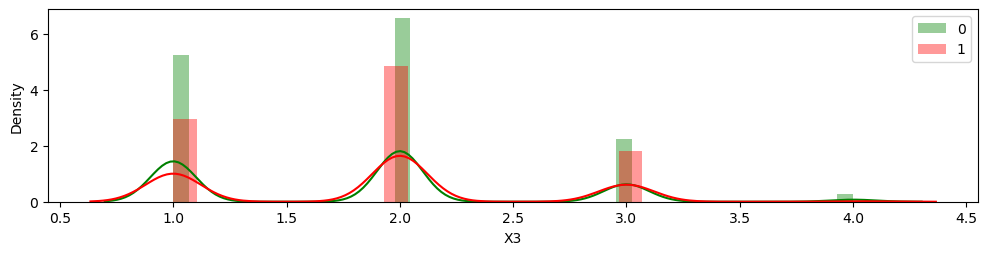

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

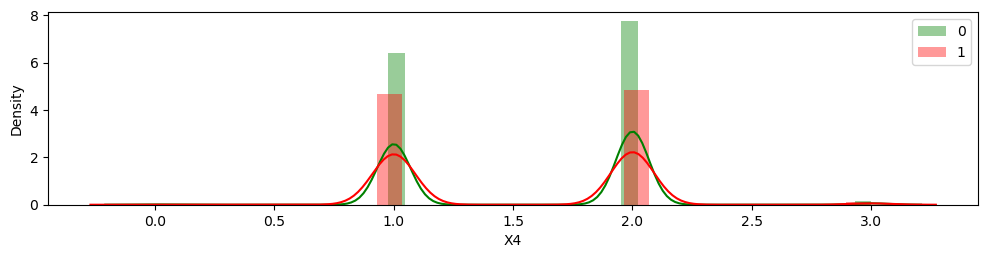

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

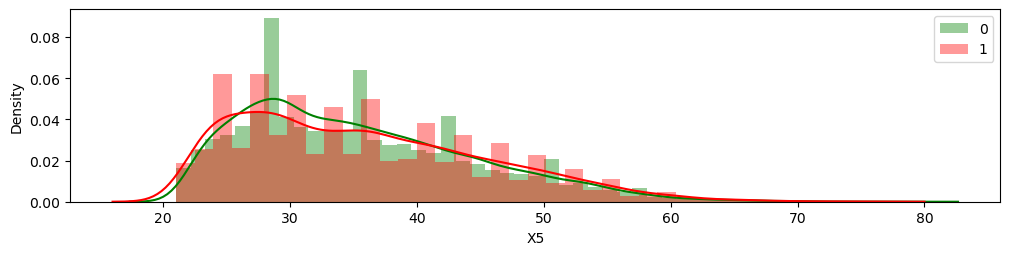

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

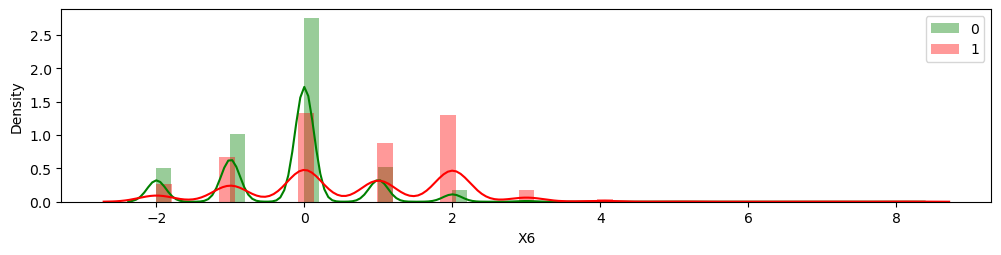

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

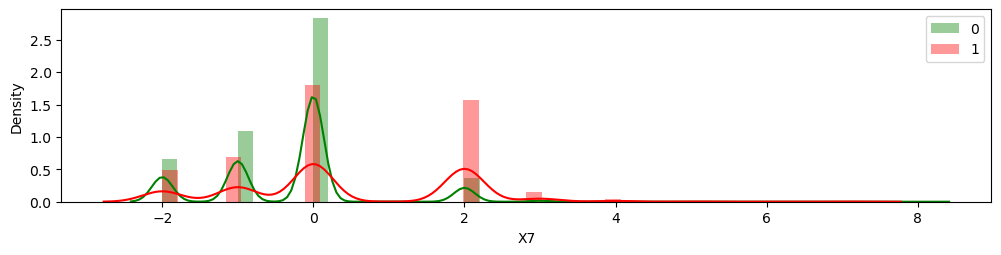

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

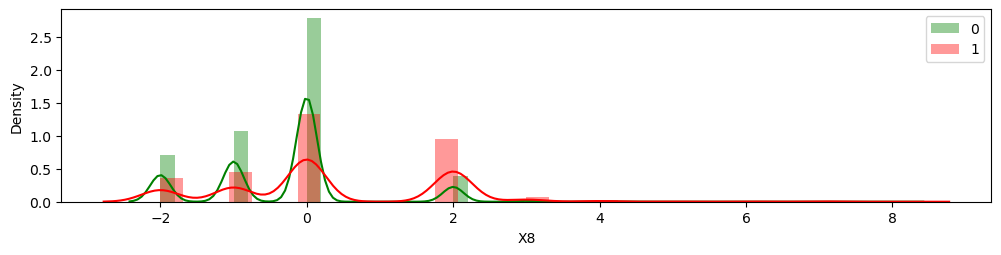

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

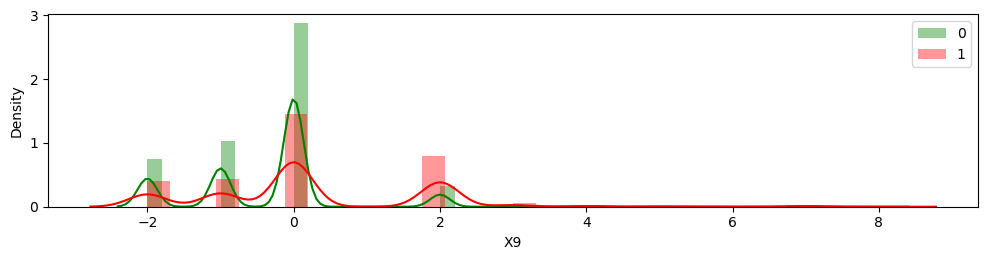

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

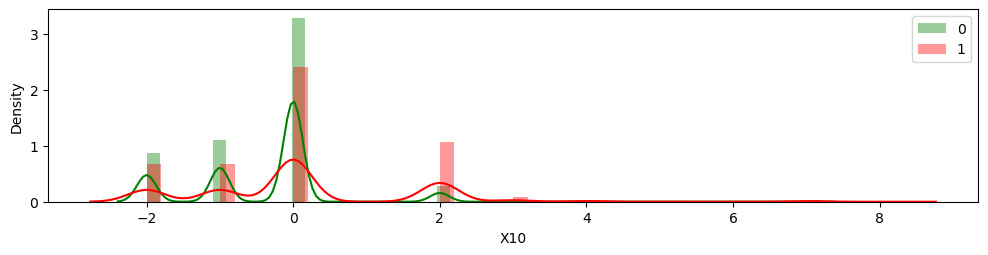

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

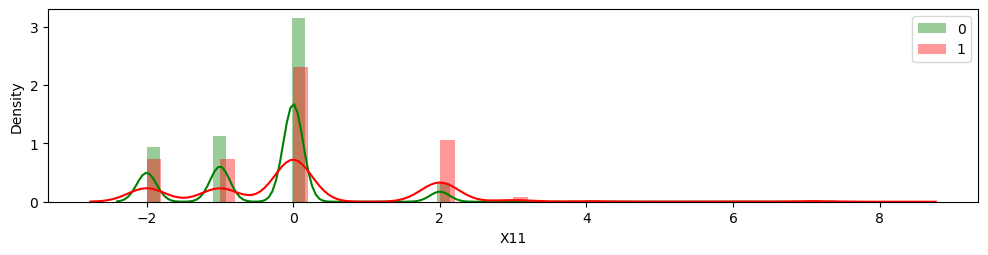

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

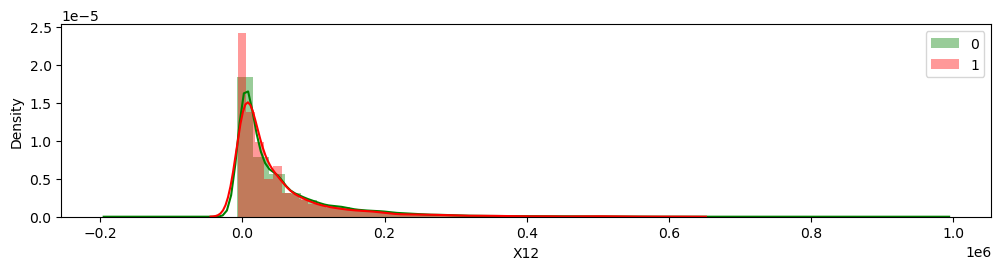

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

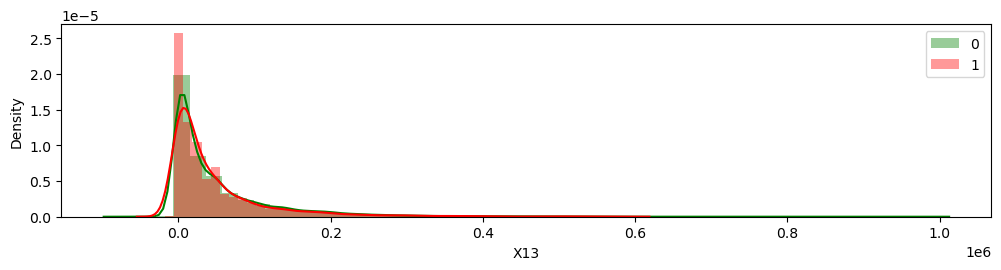

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

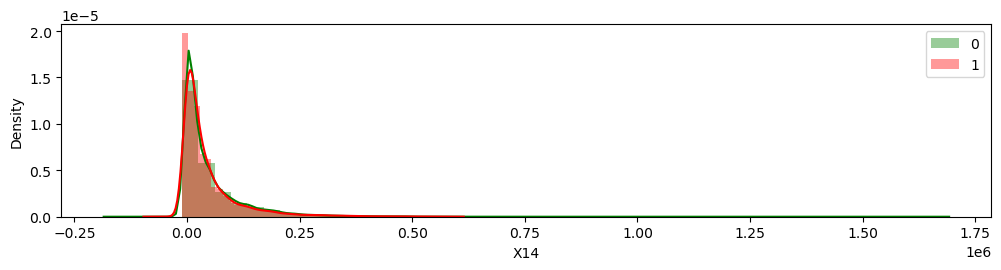

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

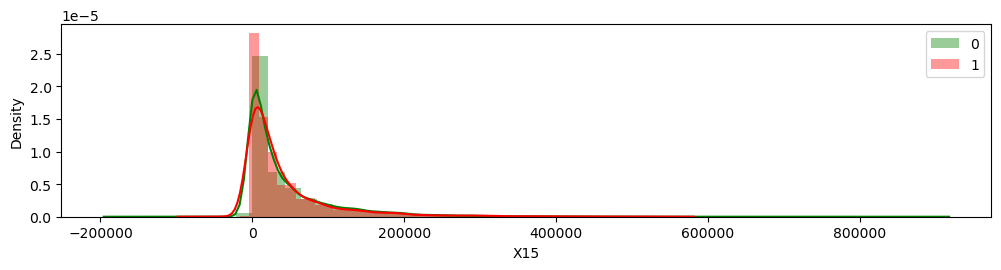

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

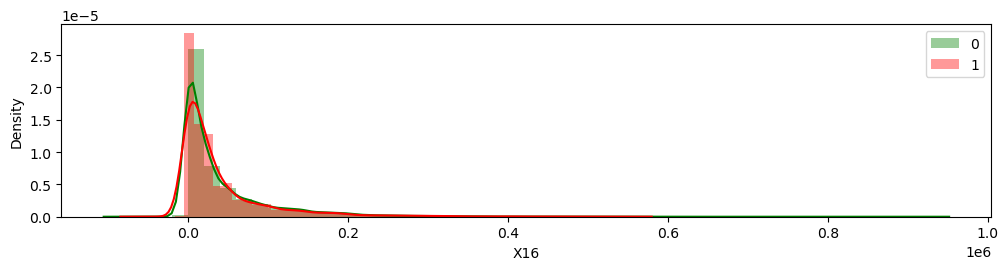

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

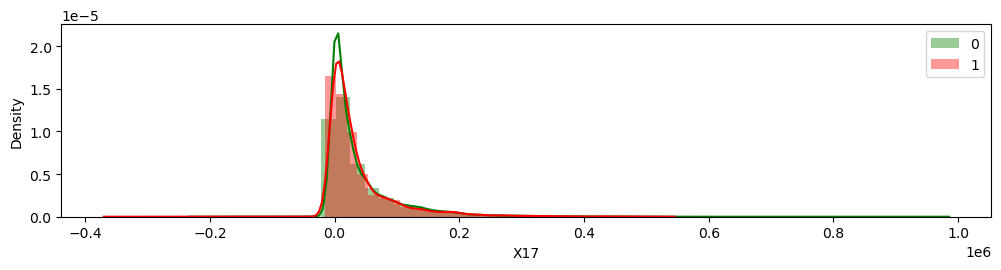

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

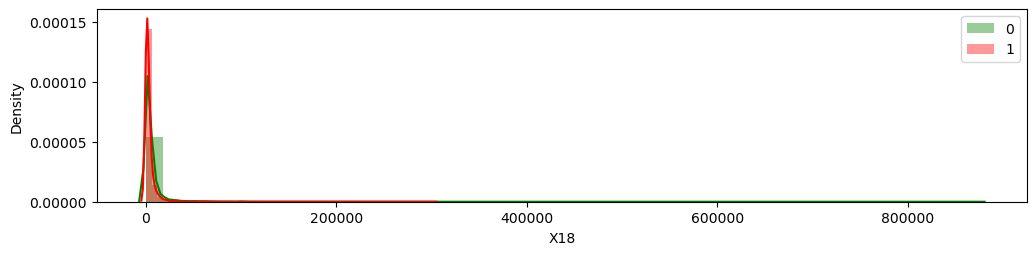

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

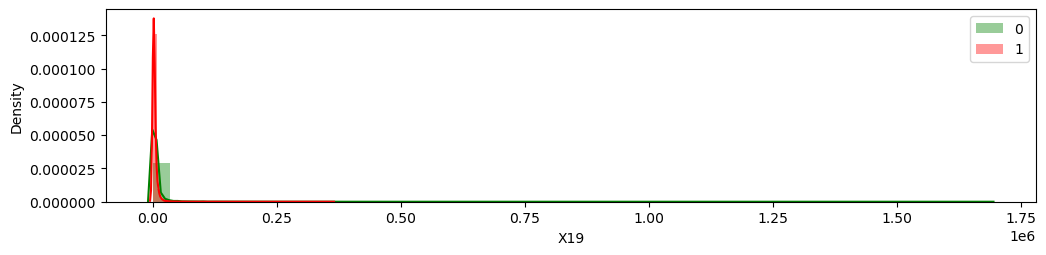

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

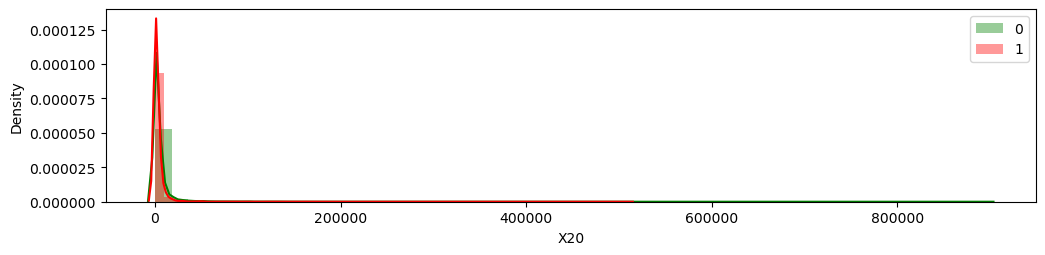

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

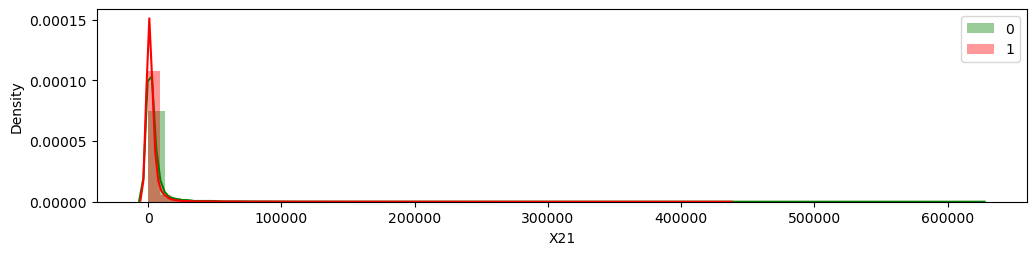

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

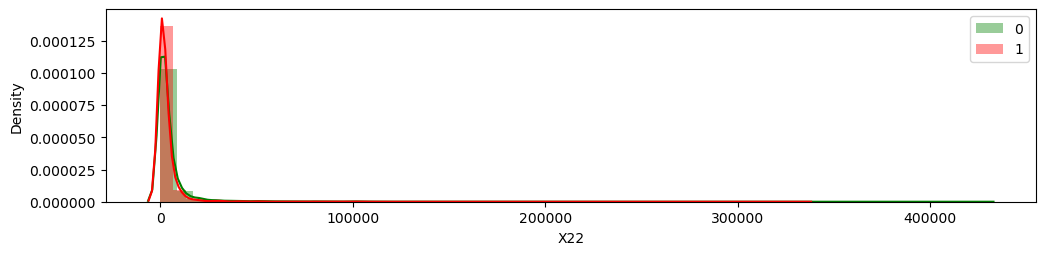

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\1295843915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

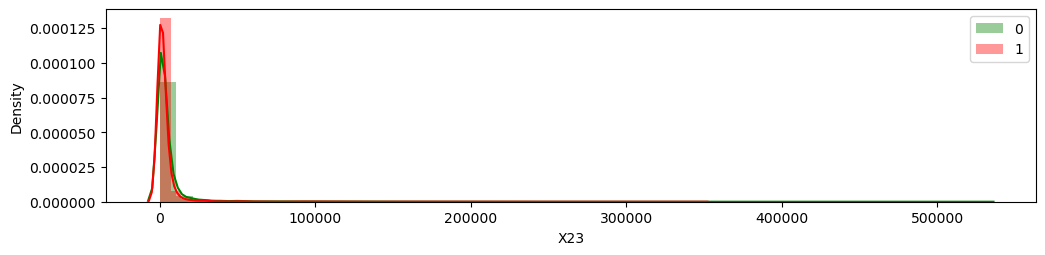

In [35]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(credit_cards.loc[credit_cards['Y']==0, col], kde=True, color='green', label='0')
    sns.distplot(credit_cards.loc[credit_cards['Y']==1, col], kde=True, color='red', label='1')
    plt.legend(loc='upper right')
    plt.show()

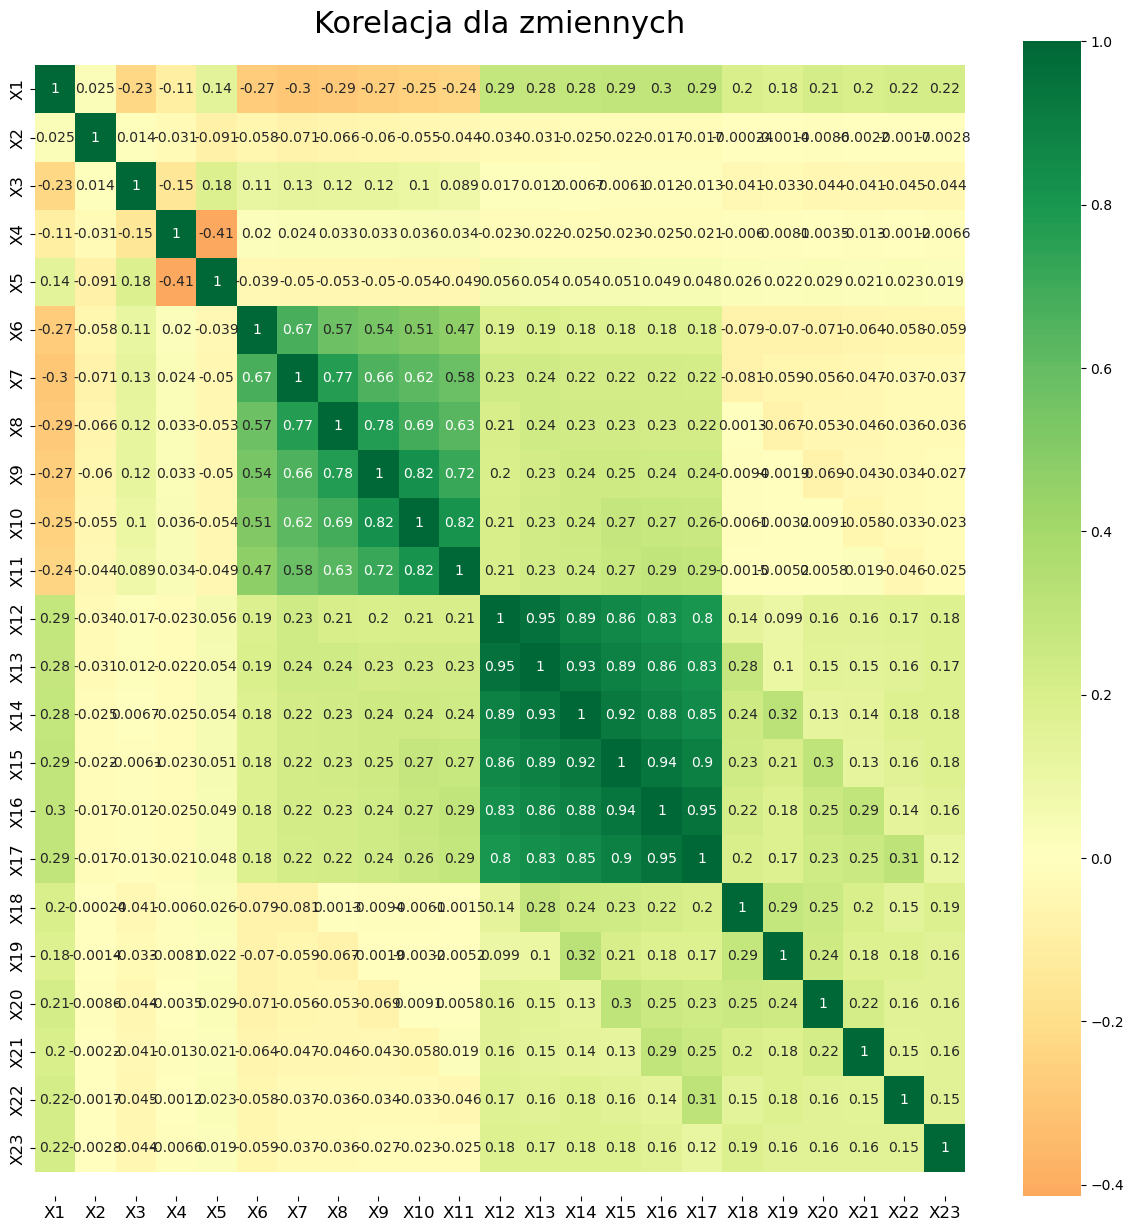

In [36]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Zmienne X12-X17 są ze sobą skorelowane bardzo mocno. Zmienne X6-X7 są ze sobą skorelowane dość mocno.

In [37]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

X6     0.324794
X7     0.263551
X8     0.235253
X9     0.216614
X10    0.204149
X11    0.186866
X3     0.033842
X5     0.013890
X17   -0.005372
X16   -0.006760
X15   -0.010156
X14   -0.014076
X13   -0.014193
X12   -0.019644
X4    -0.024339
X2    -0.039961
X23   -0.053183
X22   -0.055124
X20   -0.056250
X21   -0.056827
X19   -0.058579
X18   -0.072929
X1    -0.153520
dtype: float64

Na podstawie obserwacji wykresów pudełkowych uznałam, że zmienne X2-X5 nie wpływaja na wynik. Usunęłam.

Ze wględu na silna korelację zdecydowałam się na usunięcie kolumn z grupy "PAY_AMT". Zostawiam tylko jedna kolumnę, pięć usunęłam.

Nie pogorsza to ostatecznego accuracy.

Nie zrobiłam tego z grupą "BILL_AMT", poniewaz usunięcie większości i pozostawienie tylko jednej kolumny pogorszyło wynik.

In [38]:
features = credit_cards[['X1','X6', 'X7', 'X8', 'X9', 'X12','X18', 'X19','X21', 'X22']]
target = (credit_cards['Y'])

X, y = features, target
print('X:')
display(X)
print('\ny:')
display(y)

X:


,X1,X6,X7,X8,X9,X12,X18,X19,X21,X22
1,20000.0,2.0,2.0,-1.0,-1.0,3913.0,0.0,689.0,0.0,0.0
2,120000.0,-1.0,2.0,0.0,0.0,2682.0,0.0,1000.0,1000.0,0.0
3,90000.0,0.0,0.0,0.0,0.0,29239.0,1518.0,1500.0,1000.0,1000.0
4,50000.0,0.0,0.0,0.0,0.0,46990.0,2000.0,2019.0,1100.0,1069.0
5,50000.0,-1.0,0.0,-1.0,0.0,8617.0,2000.0,36681.0,9000.0,689.0
...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,0.0,0.0,0.0,0.0,188948.0,8500.0,20000.0,3047.0,5000.0
29997,150000.0,-1.0,-1.0,-1.0,-1.0,1683.0,1837.0,3526.0,129.0,0.0
29998,30000.0,4.0,3.0,2.0,-1.0,3565.0,0.0,0.0,4200.0,2000.0
29999,80000.0,1.0,-1.0,0.0,0.0,-1645.0,85900.0,3409.0,1926.0,52964.0



y:


1        1.0
2        1.0
3        0.0
4        0.0
5        0.0
        ... 
29996    0.0
29997    0.0
29998    1.0
29999    1.0
30000    1.0
Name: Y, Length: 30000, dtype: float64

Podzial danych. Standaryzacja dla tych modeli, gdzie będzie to potrzebne.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4321, stratify=y)
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [40]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

#### LogisticRegression

Fitting 3 folds for each of 7 candidates, totalling 21 fits
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      4673
         1.0       0.72      0.22      0.34      1327

    accuracy                           0.81      6000
   macro avg       0.77      0.60      0.61      6000
weighted avg       0.80      0.81      0.77      6000



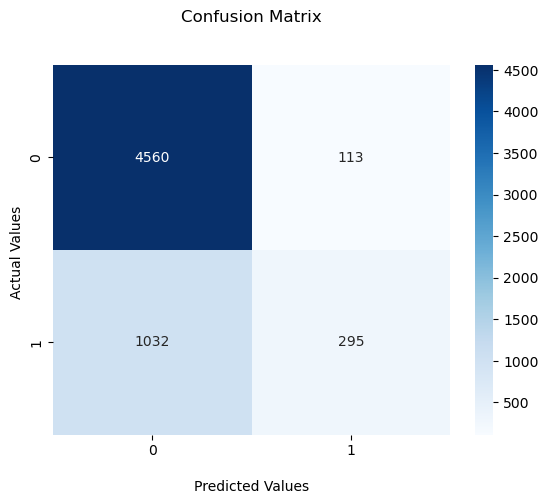

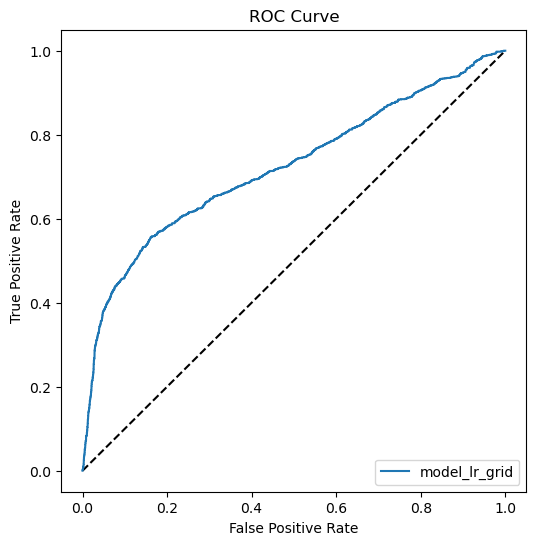

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\3950882479.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,model_lr_grid,0.340058,0.722237


In [41]:
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lr_gridsearch = GridSearchCV(model_lr,
                           param_grid,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           verbose = 3,
                           cv = 3)
lr_gridsearch.fit(X_train_standardized, y_train)
lr_model_grid = lr_gridsearch.best_estimator_
calculate_metrics(lr_model_grid, 'model_lr_grid', X_test_standardized, y_test)

####  KNeighborsClassifier

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best hyperparameter: {'leaf_size': 20, 'n_neighbors': 50, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4673
         1.0       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



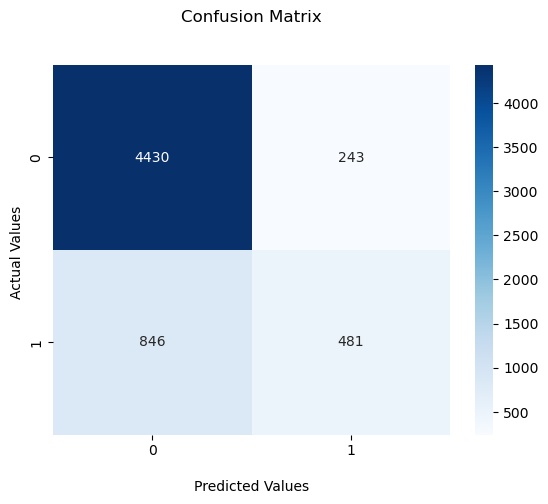

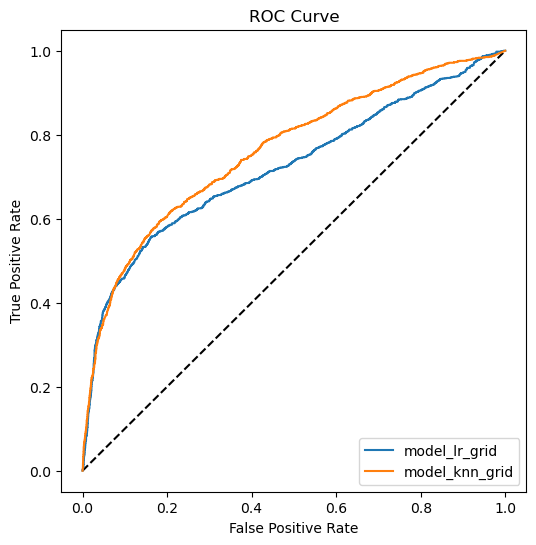

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\3950882479.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,model_lr_grid,0.340058,0.722237
1,model_knn_grid,0.469039,0.762163


In [42]:
model_knn = KNeighborsClassifier()
params_knn = {'n_neighbors': [20,30,50,100],
              'weights' : ['uniform', 'distance'],
              'leaf_size': [20,30,50,100]
              }
knn_gridsearch = GridSearchCV(model_knn,
                             params_knn,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
knn_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', knn_gridsearch.best_params_)
knn_model_grid = knn_gridsearch.best_estimator_
calculate_metrics(knn_model_grid, 'model_knn_grid', X_test_standardized, y_test)

#### RandomForestClassifier

Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best hyperparameter: {'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      4673
         1.0       0.71      0.37      0.49      1327

    accuracy                           0.83      6000
   macro avg       0.78      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



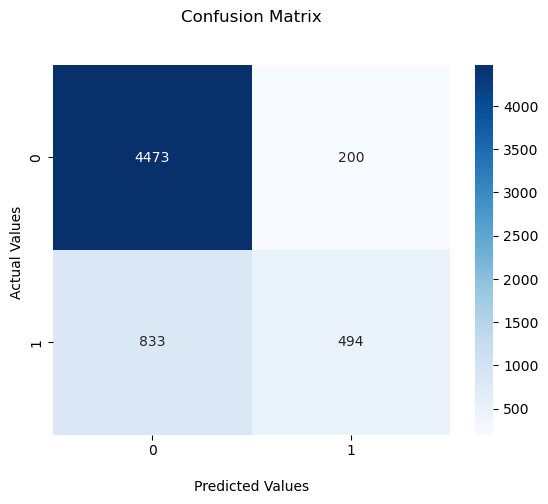

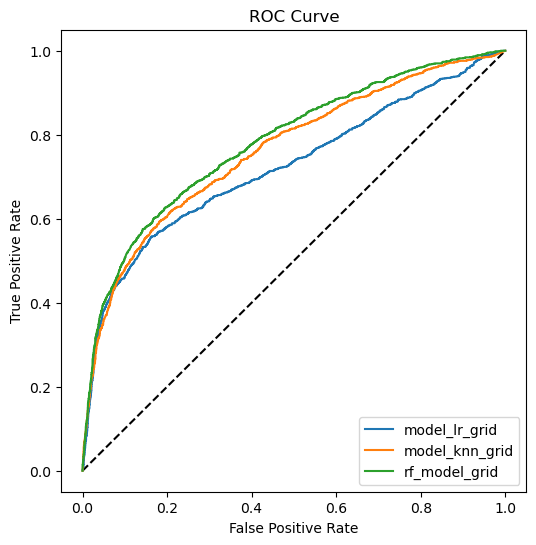

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\3950882479.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,model_lr_grid,0.340058,0.722237
1,model_knn_grid,0.469039,0.762163
2,rf_model_grid,0.488867,0.781027


In [43]:
random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [10, 20,50,100],
             'n_estimators': [20,50,70,100]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='accuracy',
                             cv=3,
                             verbose=3, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_grid = rf_gridsearch.best_estimator_
calculate_metrics(rf_model_grid, 'rf_model_grid', X_test, y_test)

#### DecisionTreeClassifier

Fitting 3 folds for each of 45 candidates, totalling 135 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 24, 'min_samples_split': 0.1}
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      4673
         1.0       0.74      0.32      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.79      0.65      0.67      6000
weighted avg       0.81      0.82      0.80      6000



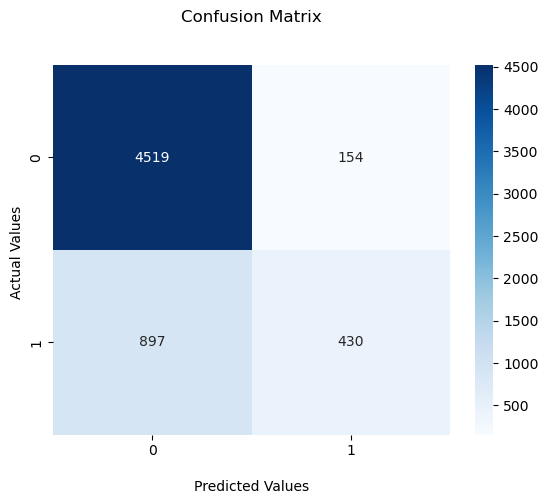

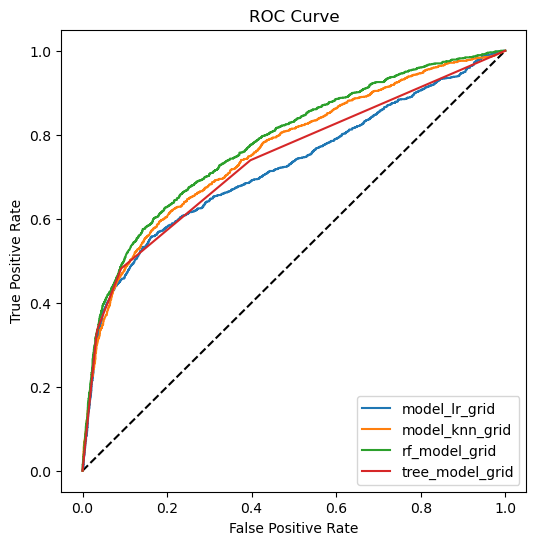

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\3950882479.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,model_lr_grid,0.340058,0.722237
1,model_knn_grid,0.469039,0.762163
2,rf_model_grid,0.488867,0.781027
3,tree_model_grid,0.450026,0.739975


In [44]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
params_tree = {'max_depth': [3,20,30,50,100],
              'min_samples_split':[0.1,0.2,0.4],
              'min_samples_leaf' : [int(X_train.shape[0]*0.001),int(X_train.shape[0]*0.003),int(X_train.shape[0]*0.005)]
              }
tree_gridsearch = GridSearchCV(model_tree,
                             params_tree,
                             scoring='accuracy',
                             cv=3,
                             verbose=3, n_jobs=-1)

tree_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', tree_gridsearch.best_params_)
tree_model_grid = tree_gridsearch.best_estimator_
calculate_metrics(tree_model_grid, 'tree_model_grid', X_test, y_test)

#### AdaBoostClassifier

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      4673
         1.0       0.64      0.34      0.44      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000



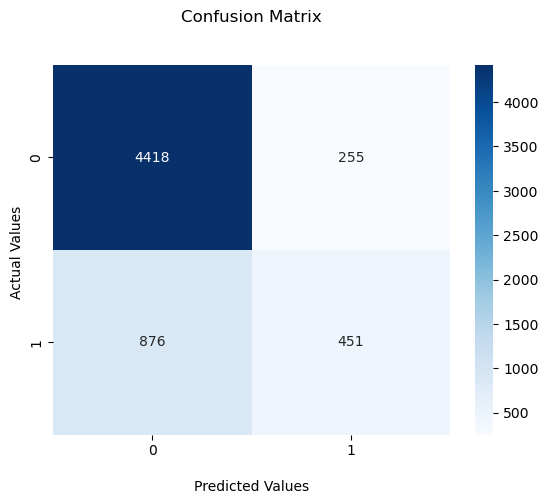

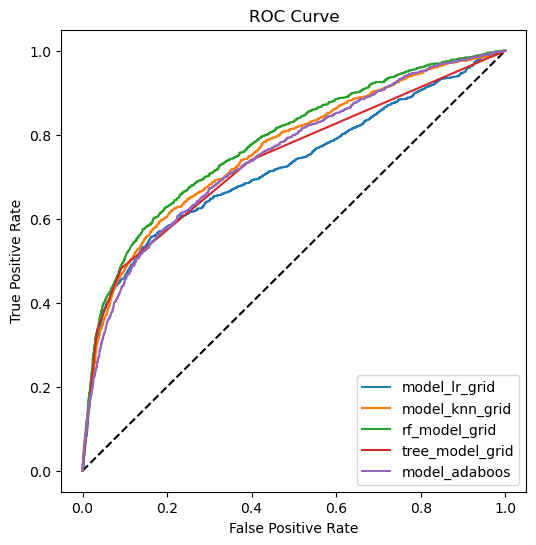

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\3950882479.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,model_lr_grid,0.340058,0.722237
1,model_knn_grid,0.469039,0.762163
2,rf_model_grid,0.488867,0.781027
3,tree_model_grid,0.450026,0.739975
4,model_adaboos,0.443679,0.750599


In [45]:
model_adaboost = AdaBoostClassifier(base_estimator=rf_model_grid, n_estimators=50)
model_adaboost.fit(X_train, y_train)
calculate_metrics(model_adaboost, 'model_adaboos', X_test, y_test)

#### VotingClassifier

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      4673
         1.0       0.73      0.34      0.46      1327

    accuracy                           0.83      6000
   macro avg       0.78      0.65      0.68      6000
weighted avg       0.81      0.83      0.80      6000



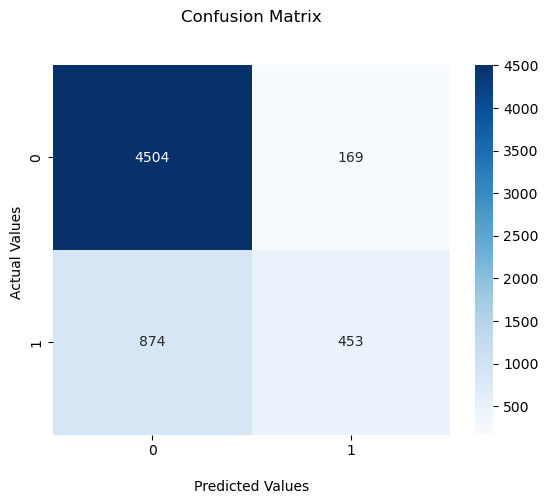

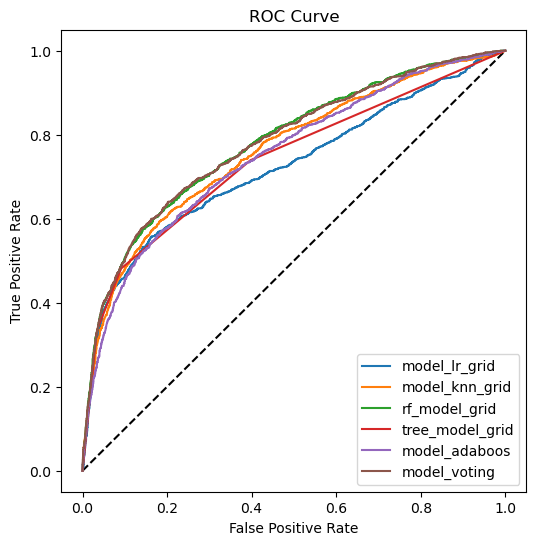

C:\Users\kulin\AppData\Local\Temp\ipykernel_9804\3950882479.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,model_lr_grid,0.340058,0.722237
1,model_knn_grid,0.469039,0.762163
2,rf_model_grid,0.488867,0.781027
3,tree_model_grid,0.450026,0.739975
4,model_adaboos,0.443679,0.750599
5,model_voting,0.464854,0.780536


In [46]:
model_voting = VotingClassifier(estimators=[('AdaBoost', model_adaboost),
                                            ('Tree', tree_model_grid),
                                            ('Random Forest', rf_model_grid)],
                                voting='soft',
                                weights=[1,2,3])

model_voting.fit(X_train, y_train)
calculate_metrics(model_voting, 'model_voting', X_test, y_test)

## Wnioski

Najlepiej wypadły RandomForestClassifier i Voting Classifier.
Nie są to świetne modele. Są tylko niewiele lepsze od zupełnego braku modelu (0.78 skuteczności przy automatycznym przyporządowaniu wszsytkich wyników y = 0). Przyczyny, dla których maksymalne accuracy, jakie udało mi się osiągnąć, wynosi 0.83 mogą być następujące:
1) moje zbyt małe doświadczenie i umięjętności
2) zbiór danych jest naprawdę liczny. Jednak pozostawiają wiele do życzenia. Zbyt wiele niepewnych wartości, które dodatkowo zostały umownie zakwalifikowane. Brakowało kontaktu z osobą, która koordynowała zbieranie tych danych - żeby móc dopytać co jest czym.